In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import statsmodels.api as sm
import folium
from folium.plugins import MarkerCluster

# the below extension properly formats a cell after it is run
%load_ext nb_black 

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)
import pandas as pd

# Set the maximum number of columns to 200
pd.set_option('display.max_columns', 200)



<IPython.core.display.Javascript object>

In [4]:
housing_no_na = pd.read_csv("data/housing_no_na.csv")

<IPython.core.display.Javascript object>

In [5]:
housing_no_na.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PavedDrive', 'PoolArea', 'P

<IPython.core.display.Javascript object>

In [6]:
# checking for highly inbalanced distributions
for col in housing_no_na.columns:
    value_counts = housing_no_na[col].value_counts(normalize=True)
    highest_freq = value_counts.max()
    if highest_freq > 0.95:
        print(f"Column {col} has highest frequency of {highest_freq:.2%}")

Column Street has highest frequency of 99.61%
Column Utilities has highest frequency of 99.92%
Column LandSlope has highest frequency of 95.27%
Column Condition2 has highest frequency of 99.03%
Column RoofMatl has highest frequency of 98.60%
Column Heating has highest frequency of 98.45%
Column LowQualFinSF has highest frequency of 98.72%
Column KitchenAbvGr has highest frequency of 95.85%
Column 3SsnPorch has highest frequency of 98.84%
Column PoolArea has highest frequency of 99.65%
Column PoolQC has highest frequency of 99.65%
Column MiscFeature has highest frequency of 96.24%
Column MiscVal has highest frequency of 96.32%


<IPython.core.display.Javascript object>

In [7]:
# checking for correlation among the variables with highly inbalanced distributions
high_freq_cols = [
    "Street",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "Heating",
    "LowQualFinSF",
    "KitchenAbvGr",
    "3SsnPorch",
    "PoolArea",
    "PoolQC",
    "MiscFeature",
    "MiscVal",
]

# create a subset of the housing_no_na dataframe with only the selected columns
subset = housing_no_na[high_freq_cols]

# create a correlation matrix
corr_matrix = subset.corr()

# display the correlation matrix
print(corr_matrix)

              LowQualFinSF  KitchenAbvGr  3SsnPorch  PoolArea   MiscVal
LowQualFinSF      1.000000     -0.014375  -0.002534 -0.005239 -0.005184
KitchenAbvGr     -0.014375      1.000000  -0.019766 -0.010906  0.040088
3SsnPorch        -0.002534     -0.019766   1.000000 -0.005441  0.001152
PoolArea         -0.005239     -0.010906  -0.005441  1.000000  0.021245
MiscVal          -0.005184      0.040088   0.001152  0.021245  1.000000


<IPython.core.display.Javascript object>

In [8]:
housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
].dtypes

Street          object
Utilities       object
LandSlope       object
Condition2      object
RoofMatl        object
Heating         object
LowQualFinSF     int64
KitchenAbvGr     int64
3SsnPorch        int64
PoolArea         int64
PoolQC          object
MiscFeature     object
MiscVal          int64
dtype: object

<IPython.core.display.Javascript object>

In [9]:
# define the independent and dependent variables
X = housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
]
y = housing_no_na["SalePrice"]

# create dummy variables for categorical columns
X = pd.get_dummies(X)

# add a constant to the independent variables
X = sm.add_constant(X)

# fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     7.098
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.92e-32
Time:                        11:10:13   Log-Likelihood:                -32502.
No. Observations:                2580   AIC:                         6.508e+04
Df Residuals:                    2544   BIC:                         6.529e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.521e+04   4.18e+0

<IPython.core.display.Javascript object>

In [10]:
# It appears that only a few of the features have a statistically significant relationship with the SalePrice. 
# These features have a p-value less than 0.05 and indicate that there is a high likelihood that 
# the coefficient is not equal to zero. These features are: Street, Utilities, LandSlope, Condition2,
# RoofMatl, Heating, PoolQC, and KitchenAbvGr. 

# I am going to drop the columns with no relationship with the sale price and highly imbalanced distributions. 

columns_to_drop = ["3SsnPorch", "PoolArea", "MiscFeature", "LowQualFinSF"]
housing_cleaned = housing_no_na.drop(columns_to_drop, axis=1)

# since i removed the misc house features Im also going to remove the value of these items
housing_cleaned['SalePrice'] = housing_cleaned['SalePrice'] - housing_cleaned['MiscVal']

# and will now remove the MiscVal column
housing_cleaned.drop('MiscVal', axis=1, inplace=True)



 


<IPython.core.display.Javascript object>

In [11]:
# Some key takeaways from running the below:
# SalePrice has a mean value of approximately 178,011 and a standard deviation of approximately 75,042.
# The YearBuilt column has a minimum value of 1872 and a maximum value of 2010, indicating that the
#     houses in the dataset were built over a wide range of years.
# The GrLivArea column has a mean value of approximately 1,486 square feet and a standard deviation
#     of approximately 489 square feet, indicating that there is a wide range in the sizes of the living
#     areas in the houses in the dataset.
# The OverallQual column has a mean value of approximately 6, indicating that most of the houses in the
#     dataset are rated as having an above average overall quality.
# The GarageCars column has a mean value of approximately 1.75, indicating that most of the houses in
#     the dataset have a 1-2 car garage.
# The TotRmsAbvGrd column has a mean value of approximately 6, indicating that most of the houses in
#     the dataset have between 5-7 rooms above ground.
# The Fireplaces column has a mean value of approximately 0.6, indicating that most of the houses in
#     the dataset have at least one fireplace.

housing_cleaned.describe()

PID    GrLivArea      SalePrice   MSSubClass  LotFrontage  \
count  2.580000e+03  2580.000000    2580.000000  2580.000000  2580.000000   
mean   7.148300e+08  1486.039922  178010.891860    57.691860    56.246899   
std    1.886626e+08   488.650181   75042.160446    42.802105    33.442906   
min    5.263011e+08   334.000000   12789.000000    20.000000     0.000000   
25%    5.313630e+08  1112.000000  129900.000000    20.000000    40.000000   
50%    5.354546e+08  1436.000000  159500.000000    50.000000    61.000000   
75%    9.071811e+08  1733.000000  209625.000000    70.000000    78.000000   
max    1.007100e+09  4676.000000  755000.000000   190.000000   313.000000   

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2580.000000  2580.000000  2580.000000  2580.000000   2580.000000   
mean    10120.153488     6.046124     5.618605  1970.313953   1983.751938   
std      8126.937892     1.367590     1.122008    29.719705     20.490242   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7406.750000     5.000000     5.000000  1953.000000   1965.000000   
50%      9391.000000     6.000000     5.000000  1972.000000   1992.000000   
75%     11494.000000     7.000000     6.000000  1999.000000   2003.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  2580.000000  2580.000000  2580.000000  2580.000000  2580.000000   
mean     98.769380   444.174031    53.218217   538.892636  1036.284884   
std     175.546045   429.340844   174.393251   425.249665   418.971677   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   214.750000   791.750000   
50%       0.000000   384.000000     0.000000   448.000000   979.000000   
75%     157.000000   732.000000     0.000000   784.000000  1266.250000   
max    1600.000000  2288.000000  1526.000000  2336.000000  3206.000000   

          1stFlrSF     2ndFlrSF  BsmtFullBath  BsmtHalfBath     FullBath  \
count  2580.000000  2580.000000   2580.000000   2580.000000  2580.000000   
mean   1144.975194   336.820155      0.434884      0.062016     1.550775   
std     375.958955   424.072452      0.518768      0.244424     0.545825   
min     334.000000     0.000000      0.000000      0.000000     0.000000   
25%     871.750000     0.000000      0.000000      0.000000     1.000000   
50%    1071.000000     0.000000      0.000000      0.000000     2.000000   
75%    1364.000000   703.000000      1.000000      0.000000     2.000000   
max    3820.000000  1872.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2580.000000   2580.000000    2580.00000   2580.000000  2580.000000   
mean      0.378295      2.850388       1.04031      6.387209     0.604264   
std       0.499237      0.822863       0.20255      1.535186     0.648604   
min       0.000000      0.000000       0.00000      2.000000     0.000000   
25%       0.000000      2.000000       1.00000      5.000000     0.000000   
50%       0.000000      3.000000       1.00000      6.000000     1.000000   
75%       1.000000      3.000000       1.00000      7.000000     1.000000   
max       2.000000      6.000000       3.00000     13.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2580.000000  2580.000000  2580.000000  2580.000000  2580.000000   
mean   1878.823643     1.746899   466.661628    95.919767    46.085271   
std     430.255846     0.739335   207.640127   129.052016    66.060664   
min      -1.000000     0.000000     0.000000     0.000000     0.000000   
25%    1957.000000     1.000000   318.000000     0.000000     0.000000   
50%    1977.000000     2.000000   474.000000     0.000000    25.500000   
75%    1999.000000     2.000000   576.000000   168.000000    68.

<IPython.core.display.Javascript object>

In [12]:
housing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2580 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          2580 non-null   object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

<IPython.core.display.Javascript object>

In [13]:
# looks like the recession had little effect on the housing market in Ames
for i in range(1, 4):
    col_name = f"BedroomAbvGr_{i}"
    filtered_data = housing_cleaned.loc[
        housing_cleaned["BedroomAbvGr"] == i, ["SalePrice", "YrSold"]
    ]
    if not filtered_data.empty:
        avg_price = filtered_data.groupby("YrSold").mean()
        print(f"Average price for {i} bedroom(s) in each year:\n{avg_price}\n")

Average price for 1 bedroom(s) in each year:
            SalePrice
YrSold               
2006    154153.210526
2007    194558.545455
2008    183832.608696
2009    145451.136364
2010    210285.538462

Average price for 2 bedroom(s) in each year:
            SalePrice
YrSold               
2006    161466.760563
2007    163147.089041
2008    159606.792857
2009    161309.225166
2010    149791.961039

Average price for 3 bedroom(s) in each year:
            SalePrice
YrSold               
2006    172470.102273
2007    173514.189911
2008    176426.335593
2009    187344.123529
2010    172955.109827



<IPython.core.display.Javascript object>

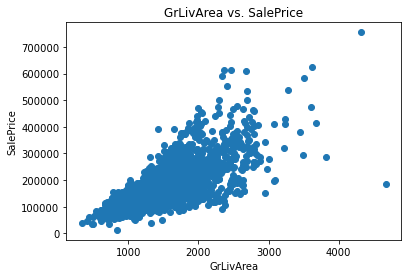

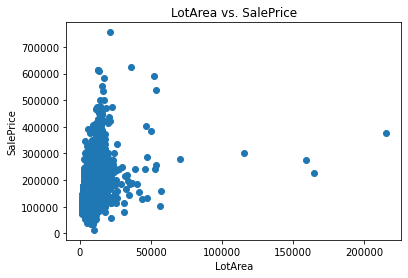

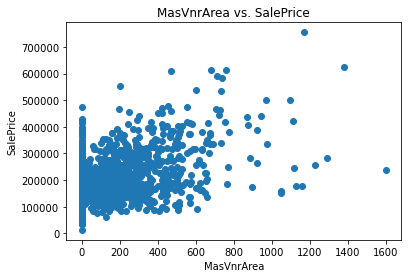

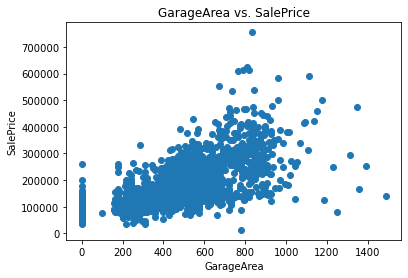

<IPython.core.display.Javascript object>

In [14]:
# taking a look at how the Area features relate to SalePrice

for column in housing_cleaned.columns:
    if "Area" in column:
        plt.scatter(housing_cleaned[column], housing_cleaned["SalePrice"])
        plt.title(f"{column} vs. SalePrice")
        plt.xlabel(column)
        plt.ylabel("SalePrice")
        plt.show()


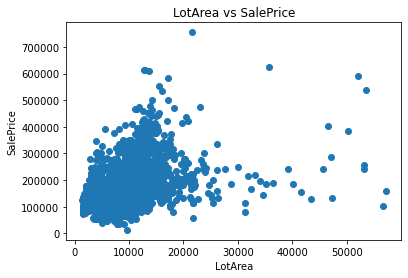

<IPython.core.display.Javascript object>

In [15]:
# after removing outliers it seems that lot area has less of an effect than expected

# Filter the DataFrame to remove the outliers
df_filtered = housing_cleaned[housing_cleaned['LotArea'] <= 60000]

# Plot the scatterplot of LotArea vs SalePrice
plt.scatter(df_filtered['LotArea'], df_filtered['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()


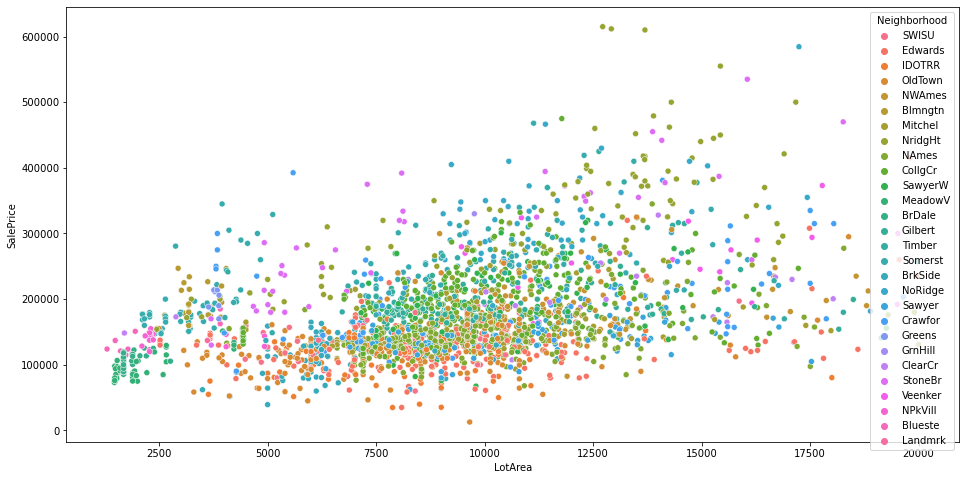

<IPython.core.display.Javascript object>

In [16]:
# when factoring in the neighborhood it looks like there is more of a relationship with lot area and sale price

# Filter out outliers with LotArea above 20000 to zoom in on the gaph
filtered = housing_cleaned[housing_cleaned['LotArea'] <= 20000]

# Create a scatterplot of LotArea vs SalePrice, colored by Neighborhood
plt.figure(figsize=(16, 8))
sns.scatterplot(data=filtered, x='LotArea', y='SalePrice', hue='Neighborhood')
plt.show()


In [17]:
# Taking a closer look at the neighborhoods
neighborhood_stats = housing_cleaned.groupby('Neighborhood')['SalePrice'].agg(['count', 'max', 'min', 'mean']).round(0)

print('\nStats for each neighborhood:')
print(neighborhood_stats.sort_values(by='mean', ascending=False))



Stats for each neighborhood:
              count     max     min      mean
Neighborhood                                 
NoRidge          67  755000  190000  326114.0
NridgHt         121  615000  154000  313662.0
StoneBr          43  591587  130000  305308.0
GrnHill           2  330000  230000  280000.0
Veenker          23  385000  150000  251263.0
Timber           54  425000  150000  242850.0
Somerst         143  468000  139000  228762.0
ClearCr          40  328000  107500  213958.0
Crawfor          93  392500   90350  201942.0
CollgCr         236  475000  110000  198104.0
Blmngtn          23  246990  159895  196237.0
Greens            8  214000  155000  193531.0
NWAmes          123  306000   82500  190330.0
Gilbert         143  377500  114250  189402.0
SawyerW         113  320000   67500  188075.0
Mitchel         104  300000   81500  162602.0
NAmes           410  345000   68000  144960.0
Blueste          10  200000  115000  143590.0
NPkVill          22  155000  120000  140743.0
Sawy

<IPython.core.display.Javascript object>

In [18]:
locations = pd.read_csv("data/locations.csv", index_col=0)
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude  
0     42.018564 -93.651619  
1     42.024855 -93.663671  
2     42.024855 -93.663671  
3     42.021548 -93.614068  
4     42.037391 -93.612207  
...         ...        ...  
2599  42.032102 -93.626373  
2600  42.027669 -93.666138  
2601  42.020129 -93.643832  
2602  42.016802 -93.689748  
2603  42.030997 -93.682220  

[2604 rows x 6 columns]

<IPython.core.display.Javascript object>

In [19]:
# Taking a closer look at the neighborhoods
neighborhood_lot = housing_cleaned.groupby('Neighborhood')['LotArea'].agg(['count', 'max', 'min', 'mean']).round(0)

print('\nStats for each neighborhood:')
print(neighborhood_lot.sort_values(by='mean', ascending=False))



Stats for each neighborhood:
              count     max   min     mean
Neighborhood                              
ClearCr          40  159000  1700  26094.0
Timber           54  215245  4054  19683.0
Veenker          23   50271  9466  15738.0
NoRidge          67   46589  9044  12971.0
Mitchel         104   43500  4500  11985.0
Crawfor          93   26073  3811  11740.0
NWAmes          123   20781  8000  11730.0
Gilbert         143   47280  7250  11288.0
NridgHt         121   20431  2268  11004.0
StoneBr          43   53504  3696  10843.0
SawyerW         113   26400  7018  10367.0
Sawyer          139   25339  4280  10289.0
Edwards         165   47007  2522  10079.0
CollgCr         236   21533  4426  10017.0
NAmes           410   31770  4058   9937.0
GrnHill           2    9763  8239   9001.0
IDOTRR           76   56600  3636   8790.0
OldTown         213   33120  2500   8366.0
SWISU            42   15863  4484   7598.0
Somerst         143   20896  2117   7323.0
BrkSide         103   21

<IPython.core.display.Javascript object>

In [81]:
# Group the data by neighborhood
grouped = housing_cleaned.groupby('Neighborhood')

# Iterate over each group
for name, group in grouped:
    # Exclude features that have "area" in the feature name and SalePrice or PID
    features = [col for col in group.columns if 'Area' not in col and 'SF' not in col and col != 'SalePrice' and col != 'PID']

#     features = [col for col in group.columns if 'Area' not in col and col != 'SalePrice' and col != 'PID']
    # Calculate the correlation coefficients between sale price and each feature
    correlations = group[features].corrwith(group['SalePrice'])
    # Get the absolute values of the correlation coefficients and sort in descending order
    correlations = correlations.abs().sort_values(ascending=False)
    # Print the name of the most important feature for predicting sale price in this neighborhood
    print(f'Most important feature for {name}: {correlations.index[0]}')


Most important feature for Blmngtn: BsmtFullBath
Most important feature for Blueste: LotFrontage
Most important feature for BrDale: TotRmsAbvGrd
Most important feature for BrkSide: OverallQual
Most important feature for ClearCr: OverallQual
Most important feature for CollgCr: OverallQual
Most important feature for Crawfor: OverallQual
Most important feature for Edwards: Fireplaces
Most important feature for Gilbert: GarageCars
Most important feature for Greens: TotRmsAbvGrd
Most important feature for GrnHill: YearBuilt
Most important feature for IDOTRR: OverallQual
Most important feature for Landmrk: MSSubClass
Most important feature for MeadowV: OverallQual
Most important feature for Mitchel: OverallQual
Most important feature for NAmes: OverallQual
Most important feature for NPkVill: MSSubClass
Most important feature for NWAmes: TotRmsAbvGrd
Most important feature for NoRidge: FullBath
Most important feature for NridgHt: OverallQual
Most important feature for OldTown: OverallQual
Mos

/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


<IPython.core.display.Javascript object>

In [20]:
import folium
import branca
from folium.plugins import MarkerCluster


# Calculate six equally spaced intervals for sale prices
sale_price_min = locations['SalePrice'].min()
sale_price_max = locations['SalePrice'].max()
interval = (sale_price_max - sale_price_min) / 10
levels = [sale_price_min + interval * i for i in range(10)]
colors = branca.colormap.LinearColormap(['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'gray'],
                                        vmin=sale_price_min, vmax=sale_price_max)


# create map centered on Ames, Iowa
m = folium.Map(location=[42.0308, -93.6319], zoom_start=12)

# create a feature group for the locations
fg = folium.FeatureGroup(name='Locations')

# loop through the locations dataframe and add a circle marker for each location
for i, row in locations.iterrows():
    lat, lon = row['latitude'], row['longitude']
    sale_price = row['SalePrice']
    for j in range(len(levels) - 1):
        if levels[j] <= sale_price < levels[j + 1]:
            color = colors(sale_price)
            break
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill_color=color,
        fill_opacity=0.7,
        popup=f'Sale Price: ${sale_price}',
    ).add_to(fg)

# add the feature group to the map
fg.add_to(m)

# add a layer control to the map
folium.LayerControl().add_to(m)

# # create the legend
legend = colors.caption = 'Sale Price'
for i in range(len(levels) - 1):
    legend += f'<br>{levels[i]:.2f} - {levels[i+1]:.2f}: <span style="color:{colors(levels[i])}">●</span>'
    
# # add the legend to the map
m.get_root().html.add_child(folium.Element(legend))


# display the map
m


<IPython.core.display.Javascript object>

In [ ]:
Looking at the map of sale prices there is a clear coorelation of neighborhoods and the sale price.
However within neighborhoods there is also a clear segmentation of sale prices based on their location
within that neighborhood.  For example, houses located across from a park have a higher sale price
and houses that face a cemetary have a lower sale price.  At first i was going to use the lon and lat
to check the proximity to something like a park, however there is a much simplier way which should be more 
effective.  I can look into how the street within a neighborhood changes the sale price.  This should
show the correlation of the sale price with the surrounded features such as airports, parks, golf course,
living on a high traffic road such as a highway, and cul de sacs. 

In [21]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude  
0     42.018564 -93.651619  
1     42.024855 -93.663671  
2     42.024855 -93.663671  
3     42.021548 -93.614068  
4     42.037391 -93.612207  
...         ...        ...  
2599  42.032102 -93.626373  
2600  42.027669 -93.666138  
2601  42.020129 -93.643832  
2602  42.016802 -93.689748  
2603  42.030997 -93.682220  

[2604 rows x 6 columns]

<IPython.core.display.Javascript object>

In [ ]:
# locations["Neighborhood_St"] = [
#     addr + ", AMES, USA" if type(addr) == str else None for addr in locations.Prop_Addr
# ]

In [38]:
real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv", index_col=0)
real_estate.head()

/var/folders/2g/w2gh47jx2d536k1lqy8yjms40000gn/T/ipykernel_2899/13569117.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv", index_col=0)


GeoRefNo  Tier  Range                 Prop_Addr ZngCdPr ZngCdSc  \
MapRefNo                                                                      
520400001  520400001     0      0  4599 GEORGE W CARVER AVE   FS-RL     NaN   
520440010  520440010     0      0         4507 EVEREST  AVE   FS-RL     NaN   
520440020  520440020     0      0         4513 EVEREST  AVE   FS-RL     NaN   
520445001  520445001     0      0          3449 BARCELOS ST   FS-RL     NaN   
520445010  520445010     0      0         4506 EVEREST  AVE   FS-RL     NaN   

          ZngOLPr ZngOLSc    ClassPr_S                             ClassSc_S  \
MapRefNo                                                                       
520400001     NaN     NaN  RESIDENTIAL  VACANT LAND - IMPROVED OR UNIMPROVED   
520440010     NaN     NaN  RESIDENTIAL  VACANT LAND - IMPROVED OR UNIMPROVED   
520440020     NaN     NaN  RESIDENTIAL  VACANT LAND - IMPROVED OR UNIMPROVED   
520445001     NaN     NaN  RESIDENTIAL               ASSOCIATION COMMON AREA   
520445010     NaN     NaN  RESIDENTIAL  VACANT LAND - IMPROVED OR UNIMPROVED   

                                             Legal_Pr  SchD_S  TxD_S  \
MapRefNo                                                               
520400001  SCENIC VALLEY SD 4TH ADD \nOUTLOT V\n AMES       5     45   
520440010     SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES       5     45   
520440020     SCENIC VALLEY SD 4TH ADD LOT:17 \n AMES       5     45   
520445001  SCENIC VALLEY SD 4TH ADD \nOUTLOT F\n AMES       5     45   
520445010     SCENIC VALLEY SD 4TH ADD LOT:19 \n AMES       5     45   

                                                MA_Ownr1 MA_Ownr2  \
MapRefNo                                                            
520400001                 HUNZIKER DEVELOPMENT GROUP LLC      NaN   
520440010                 HUNZIKER DEVELOPMENT GROUP LLC      NaN   
520440020                                HAPPE HOMES LLP      NaN   
520445001  SCENIC VALLEY PROPERTY OWNERS ASSOCIATION INC      NaN   
520445010                                HAPPE HOMES LLP      NaN   

                             MA_Line1  MA_Line2 MA_City MA_State  MA_Zip1  \
MapRefNo                                                                    
520400001               105 S 16TH ST       NaN    AMES       IA  50010.0   
520440010               105 S 16TH ST       NaN    AMES       IA  50010.0   
520440020  2575 N ANKENY BLVD STE 211       NaN  ANKENY       IA  50023.0   
520445001               105 S 16TH ST       NaN    AMES       IA  50010.0   
520445010  2575 N ANKENY BLVD STE 211       NaN  ANKENY       IA  50023.0   

           MA_Zip2  Rcrd_Yr  Rcrd_Mo    Inst1_No  Inst1_Yr  Inst1_Mo Inst1TPr  \
MapRefNo                                                                        
520400001      NaN   2019.0      7.0   201906213    2019.0       7.0      NaN   
520440010      NaN   2019.0      7.0   201906213    2019.0       7.0      NaN   
520440020      NaN   2020.0      5.0  2020-04989    2020.0       5.0      WRD   
520445001      NaN   2020.0      4.0  2020-03063    2020.0       4.0      WRD   
520445010      NaN   2019.0     10.0  2019-10001    2019.0      10.0      WRD   

           LndAc_S  ImpAc_S  OthAc_S  TtlVal_AsrYr ValType X1TPr_D X1TSc_D  \
MapRefNo                                                                     
520400001   481100        0        0        481100       L     NaN     NaN   
520440010     5700        0        0          5700       L     NaN     NaN   
520440020     4400        0        0          4400       L     NaN     NaN   
520445001     7100        0        0          7100       L     NaN     NaN   
520445010     7200        0        0          7200       L     NaN     NaN   

           X2TPr_D X2TSc_D X1TPr_S X1TSc_S  X2TPr_S X2TSc_S  LndAcX1S  \
MapRefNo                                                                
520400001      NaN     NaN     NaN     NaN      NaN     NaN         0   
520440010      NaN     NaN     NaN

<IPython.core.display.Javascript object>

In [23]:
real_estate.columns.sort_values()

Index(['AcreGr', 'AcreNt_S', 'AcreX_S1', 'BldgNo_S', 'BldgType', 'Cars',
       'Central Air', 'ClassPr_S', 'ClassSc_S', 'Date', 'DwlgNo_S', 'Ext1',
       'Ext2', 'Fireplaces', 'Foundation', 'GLA', 'GarYrBlt', 'GarageArea',
       'GarageType', 'GeoRefNo', 'HSTtl_D', 'HSTtl_S', 'Heating', 'HouseStyle',
       'ImpAcX1S', 'ImpAcX2S', 'ImpAc_S', 'Inst1TPr', 'Inst1_Mo', 'Inst1_No',
       'Inst1_Yr', 'Legal_Pr', 'LndAcX1S', 'LndAc_S', 'LotArea', 'MA_City',
       'MA_Line1', 'MA_Line2', 'MA_Ownr1', 'MA_Ownr2', 'MA_State', 'MA_Zip1',
       'MA_Zip2', 'MasVnrType', 'MilVal_D', 'MilVal_S', 'MoSold_MM',
       'Neighborhood', 'NmbrBRs', 'OthAc_S', 'PA-Nmbr', 'PA-PostD', 'PA-PreD',
       'PA-StSfx', 'PA-Strt', 'PA-UnTyp', 'PA-UntNo', 'ParType', 'ParclRel',
       'PoolArea', 'Prop_Addr', 'Range', 'Rcrd_Mo', 'Rcrd_Yr', 'RoofMatl',
       'SaleCond', 'SalePrice', 'SaleType', 'SchD_S', 'Source', 'Tier',
       'TotRmsAbvGrd', 'TtlBsmtSF', 'TtlVal_AsrYr', 'TxD_S', 'ValType',
       'X1TPr_D', '

<IPython.core.display.Javascript object>

In [26]:
# import re


# def get_street_name(address):
#     # This function extracts the street name from the address
#     # It removes the street number, city, and state from the address
# The street name is assumed to be the first word after the first comma
#     # If the address is not in the expected format, the original address is returned
#     match = re.match(r"^\d+ ([^,]+), [A-Z]{2}, [A-Z]{3} \d{5}$", address)
#     if match:
#         return match.group(1)
#     else:
#         return address


# # Apply the get_street_name function to the Prop_Addr column
# locations["street_name"] = locations["Prop_Addr"].apply(get_street_name)

# # Combine the Neighborhood and street_name columns to create the Neighborhood_st column
# locations["Neighborhood_st"] = (
#     locations["Neighborhood"] + "_" + locations["street_name"]
# )

# # Drop the street_name column
locations = locations.drop("Neighborhood_st", axis=1)

<IPython.core.display.Javascript object>

In [27]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude  
0     42.018564 -93.651619  
1     42.024855 -93.663671  
2     42.024855 -93.663671  
3     42.021548 -93.614068  
4     42.037391 -93.612207  
...         ...        ...  
2599  42.032102 -93.626373  
2600  42.027669 -93.666138  
2601  42.020129 -93.643832  
2602  42.016802 -93.689748  
2603  42.030997 -93.682220  

[2604 rows x 6 columns]

<IPython.core.display.Javascript object>

In [63]:
def get_street_name(address):
    # This function extracts the street name from the address
    # The street name should be everything after the first number in the string that is not a space.
    # The street name should also continue up until the comma.
    # If there are any spaces in the street name, they should be replaced with underscores.
    parts = address.split(',')
    if len(parts) > 0:
        street = parts[0].split(' ', 1)[-1].replace(' ', '_')
        return street
    else:
        return ''

# Apply the get_street_name function to the Prop_Addr column
locations['street_name'] = locations['Prop_Addr'].apply(get_street_name)

# Combine the Neighborhood and street_name columns to create the Neighborhood_st column
#locations['Neighborhood_st'] = locations['Neighborhood'] + '_' + locations['street_name']

# Drop the street_name column
#locations = locations.drop('street_name', axis=1)


<IPython.core.display.Javascript object>

In [66]:
locations


PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude        Neighborhood_st    street_name  
0     42.018564 -93.651619      SWISU_HAYWARD_AVE    HAYWARD_AVE  
1     42.024855 -93.663671        Edwards_WEST_ST        WEST_ST  
2     42.024855 -93.663671        Edwards_WEST_ST        WEST_ST  
3     42.021548 -93.614068        IDOTRR_S_2ND_ST       S_2ND_ST  
4     42.037391 -93.612207    OldTown_DOUGLAS_AVE    DOUGLAS_AVE  
...         ...        ...                    ...            ...  
2599  42.032102 -93.626373  BrkSide_RIDGEWOOD_AVE  RIDGEWOOD_AVE  
2600  42.027669 -93.666138       Edwards_MARY_CIR       MARY_CIR  
2601  42.020129 -93.643832      Crawfor_SUNSET_DR      SUNSET_DR  
2602  42.016802 -93.689748   CollgCr_CLEMENS_BLVD   CLEMENS_BLVD  
2603  42.030997 -93.682220     SawyerW_VERMONT_CT     VERMONT_CT  

[2604 rows x 8 columns]

<IPython.core.display.Javascript object>

In [67]:
locations["street_name"].value_counts()

CLARK_AVE           37
CARROLL_AVE         29
CLEMENS_BLVD        28
EISENHOWER_AVE      28
NORTHWESTERN_AVE    28
                    ..
RED_OAK_DR           1
BALSAM_CIR           1
HUNZIKER_CIR         1
N_4TH_ST             1
HEMLOCK_CIR          1
Name: street_name, Length: 445, dtype: int64

<IPython.core.display.Javascript object>

In [68]:
locations["Neighborhood"].value_counts()

NAmes      415
CollgCr    240
OldTown    212
Edwards    167
Somerst    145
Gilbert    145
Sawyer     141
NWAmes     124
NridgHt    123
SawyerW    113
Mitchel    104
BrkSide    104
Crawfor     94
IDOTRR      77
NoRidge     67
Timber      52
StoneBr     45
SWISU       41
ClearCr     39
MeadowV     38
BrDale      30
Blmngtn     23
Veenker     23
NPkVill     23
Blueste     10
Greens       8
Landmrk      1
Name: Neighborhood, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
locations["Neighborhood_st"].value_counts()

CollgCr_CLEMENS_BLVD                   28
Gilbert_WELBECK_DR                     25
NAmes_CLARK_AVE                        22
BrkSide_RIDGEWOOD_AVE                  21
NridgHt_HARRISON_RD                    20
                                       ..
NAmes_LUTHER_DR_2732                    1
NWAmes_TAFT_AVE                         1
Edwards_COLORADO_AVE_110                1
Blueste_LITTLE_BLUESTEM_CT_UNIT_107     1
Crawfor_SUNSET_DR_2142                  1
Name: Neighborhood_st, Length: 561, dtype: int64

<IPython.core.display.Javascript object>

In [32]:
# looks like some numbers carried over so im removing these
def remove_number(string):
    # This function removes the number and the preceding underscore from a string that ends with a number
    match = re.search(r'_(\d+)$', string)
    if match:
        number = match.group(1)
        return string[:-len(number)-1]
    else:
        return string

# Apply the remove_number function to the Neighborhood_st column
locations['Neighborhood_st'] = locations['Neighborhood_st'].apply(remove_number)
locations['street_name'] = locations['street_name'].apply(remove_number)

<IPython.core.display.Javascript object>

In [35]:
locations["Neighborhood_st"].value_counts()

CollgCr_CLEMENS_BLVD     28
Gilbert_WELBECK_DR       25
BrkSide_RIDGEWOOD_AVE    22
NAmes_CLARK_AVE          22
NridgHt_HARRISON_RD      20
                         ..
Timber_RED_OAK_DR         1
NoRidge_BALSAM_CIR        1
NAmes_HUNZIKER_CIR        1
IDOTRR_N_4TH_ST           1
NoRidge_HEMLOCK_CIR       1
Name: Neighborhood_st, Length: 504, dtype: int64

<IPython.core.display.Javascript object>

In [52]:
locations[locations['Neighborhood_st'].str.contains('Ames')]


PID  SalePrice Neighborhood                          Prop_Addr  \
5     534177230     227000       NWAmes       2304 FILLMORE AVE, AMES, USA   
14    535105100     159000        NAmes        2519 KELLOGG AVE, AMES, USA   
19    534152050     205000       NWAmes  2102 PRAIRIE VIEW EAST, AMES, USA   
29    534128010     200000       NWAmes         1636 JOHNSON ST, AMES, USA   
35    535453210     155000        NAmes        1522 MAXWELL AVE, AMES, USA   
...         ...        ...          ...                                ...   
2583  535179020     159500        NAmes             306 22ND ST, AMES, USA   
2587  535101110     119000        NAmes          2712 LUTHER DR, AMES, USA   
2588  535402220     159000        NAmes         201 E O NEIL DR, AMES, USA   
2592  534479150     112900        NAmes          1311 GRAND AVE, AMES, USA   
2597  534430050     129800        NAmes          1008 MURRAY DR, AMES, USA   

       latitude  longitude           Neighborhood_st  
5     42.044554 -93.631818       NWAmes_FILLMORE_AVE  
14    42.046902 -93.615721         NAmes_KELLOGG_AVE  
19    42.043316 -93.637279  NWAmes_PRAIRIE_VIEW_EAST  
29    42.049034 -93.632646         NWAmes_JOHNSON_ST  
35    42.037274 -93.606759         NAmes_MAXWELL_AVE  
...         ...        ...                       ...  
2583  42.043760 -93.613907             NAmes_22ND_ST  
2587  42.048256 -93.619860           NAmes_LUTHER_DR  
2588  42.040102 -93.609379         NAmes_E_O_NEIL_DR  
2592  42.034789 -93.620532           NAmes_GRAND_AVE  
2597  42.039187 -93.623896           NAmes_MURRAY_DR  

[539 rows x 7 columns]

<IPython.core.display.Javascript object>

In [51]:
locations["Neighborhood_st"].value_counts()

CollgCr_CLEMENS_BLVD     28
Gilbert_WELBECK_DR       25
BrkSide_RIDGEWOOD_AVE    22
NAmes_CLARK_AVE          22
NridgHt_HARRISON_RD      20
                         ..
Timber_RED_OAK_DR         1
NoRidge_BALSAM_CIR        1
NAmes_HUNZIKER_CIR        1
IDOTRR_N_4TH_ST           1
NoRidge_HEMLOCK_CIR       1
Name: Neighborhood_st, Length: 504, dtype: int64

<IPython.core.display.Javascript object>

In [54]:
vc = locations["Neighborhood_st"].value_counts()
vc[vc > 10]

CollgCr_CLEMENS_BLVD       28
Gilbert_WELBECK_DR         25
BrkSide_RIDGEWOOD_AVE      22
NAmes_CLARK_AVE            22
NridgHt_HARRISON_RD        20
NAmes_DUFF_AVE             20
Somerst_BRISTOL_DR         19
CollgCr_HEMINGWAY_DR       19
OldTown_BURNETT_AVE        19
NAmes_MAXWELL_AVE          19
SawyerW_KANSAS_DR          18
Sawyer_ARIZONA_AVE         18
NWAmes_EISENHOWER_AVE      17
OldTown_KELLOGG_AVE        16
CollgCr_SCHUBERT_ST        16
Sawyer_TORONTO_ST          16
OldTown_CLARK_AVE          15
Somerst_KINGSTON_DR        15
NAmes_MELROSE_AVE          15
NAmes_CARROLL_AVE          15
Sawyer_ONTARIO_ST          15
BrkSide_MARSTON_AVE        15
OldTown_DOUGLAS_AVE        15
Blmngtn_WESTWIND_DR        15
Somerst_CLAYTON_DR         15
Sawyer_ROSS_RD             15
CollgCr_POE_AVE            15
MeadowV_MEADOW_PL          14
Edwards_MARIGOLD_DR        14
Gilbert_WESTLAWN_DR        14
BrDale_TRUMAN_PL           14
OldTown_CARROLL_AVE        14
SawyerW_INDIANA_AVE        13
Gilbert_BE

<IPython.core.display.Javascript object>

In [55]:
locations[locations["Neighborhood_st"] == "CollgCr_CLEMENS_BLVD"]

PID  SalePrice Neighborhood                     Prop_Addr  \
104   907280170     210000      CollgCr  4619 CLEMENS BLVD, AMES, USA   
137   907260050     213000      CollgCr  5110 CLEMENS BLVD, AMES, USA   
148   907192010     200000      CollgCr  5301 CLEMENS BLVD, AMES, USA   
164   907196020     205000      CollgCr  5216 CLEMENS BLVD, AMES, USA   
386   907194110     187100      CollgCr  5344 CLEMENS BLVD, AMES, USA   
604   907192120     226000      CollgCr  5421 CLEMENS BLVD, AMES, USA   
730   907285080     210000      CollgCr  4532 CLEMENS BLVD, AMES, USA   
731   907285050     191000      CollgCr  4606 CLEMENS BLVD, AMES, USA   
763   907192030     195000      CollgCr  5313 CLEMENS BLVD, AMES, USA   
802   907285100     237000      CollgCr  4520 CLEMENS BLVD, AMES, USA   
818   907194130     192500      CollgCr  5408 CLEMENS BLVD, AMES, USA   
819   907250070     250000      CollgCr  5115 CLEMENS BLVD, AMES, USA   
877   907260030     198500      CollgCr  5014 CLEMENS BLVD, AMES, USA   
900   907260040     192000      CollgCr  5020 CLEMENS BLVD, AMES, USA   
1201  907192090     227000      CollgCr  5401 CLEMENS BLVD, AMES, USA   
1256  907260010     255900      CollgCr  5002 CLEMENS BLVD, AMES, USA   
1299  907192130     221000      CollgCr  5427 CLEMENS BLVD, AMES, USA   
1874  907254090     222500      CollgCr  4709 CLEMENS BLVD, AMES, USA   
2055  907194160     203000      CollgCr  5426 CLEMENS BLVD, AMES, USA   
2110  907265010     211000      CollgCr  4920 CLEMENS BLVD, AMES, USA   
2128  907265030     230000      CollgCr  4908 CLEMENS BLVD, AMES, USA   
2148  907280100     285000      CollgCr  4521 CLEMENS BLVD, AMES, USA   
2248  907285020     219500      CollgCr  4624 CLEMENS BLVD, AMES, USA   
2378  907285010     227000      CollgCr  4630 CLEMENS BLVD, AMES, USA   
2379  907192150     180000      CollgCr  5443 CLEMENS BLVD, AMES, USA   
2495  907192020     190550      CollgCr  5307 CLEMENS BLVD, AMES, USA   
2580  907285040     240000      CollgCr  4612 CLEMENS BLVD, AMES, USA   
2602  907192040     217500      CollgCr  5319 CLEMENS BLVD, AMES, USA   

       latitude  longitude       Neighborhood_st  
104   42.018014 -93.681354  CollgCr_CLEMENS_BLVD  
137   42.016945 -93.687951  CollgCr_CLEMENS_BLVD  
148   42.016892 -93.689424  CollgCr_CLEMENS_BLVD  
164   42.016905 -93.688570  CollgCr_CLEMENS_BLVD  
386   42.016517 -93.690155  CollgCr_CLEMENS_BLVD  
604   42.016317 -93.691593  CollgCr_CLEMENS_BLVD  
730   42.017858 -93.680177  CollgCr_CLEMENS_BLVD  
731   42.017848 -93.681189  CollgCr_CLEMENS_BLVD  
763   42.016831 -93.689640  CollgCr_CLEMENS_BLVD  
802   42.017859 -93.680013  CollgCr_CLEMENS_BLVD  
818   42.016202 -93.691337  CollgCr_CLEMENS_BLVD  
819   42.017111 -93.687992  CollgCr_CLEMENS_BLVD  
877   42.016966 -93.686903  CollgCr_CLEMENS_BLVD  
900   42.016965 -93.686950  CollgCr_CLEMENS_BLVD  
1201  42.016408 -93.691230  CollgCr_CLEMENS_BLVD  
1256  42.016967 -93.686808  CollgCr_CLEMENS_BLVD  
1299  42.016293 -93.691703  CollgCr_CLEMENS_BLVD  
1874  42.018015 -93.682896  CollgCr_CLEMENS_BLVD  
2055  42.016123 -93.691671  CollgCr_CLEMENS_BLVD  
2110  42.016971 -93.685831  CollgCr_CLEMENS_BLVD  
2128  42.016972 -93.685734  CollgCr_CLEMENS_BLVD  
2148  42.018025 -93.680016  CollgCr_CLEMENS_BLVD  
2248  42.017848 -93.681435  CollgCr_CLEMENS_BLVD  
2378  42.017848 -93.681517  CollgCr_CLEMENS_BLVD  
2379  42.016237 -93.691997  CollgCr_CLEMENS_BLVD  
2495  42.016862 -93.689532  CollgCr_CLEMENS_BLVD  
2580  42.017848 -93.681271  CollgCr_CLEMENS_BLVD  
2602  42.016802 -93.689748  CollgCr_CLEMENS_BLVD

<IPython.core.display.Javascript object>

In [56]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude        Neighborhood_st  
0     42.018564 -93.651619      SWISU_HAYWARD_AVE  
1     42.024855 -93.663671        Edwards_WEST_ST  
2     42.024855 -93.663671        Edwards_WEST_ST  
3     42.021548 -93.614068        IDOTRR_S_2ND_ST  
4     42.037391 -93.612207    OldTown_DOUGLAS_AVE  
...         ...        ...                    ...  
2599  42.032102 -93.626373  BrkSide_RIDGEWOOD_AVE  
2600  42.027669 -93.666138       Edwards_MARY_CIR  
2601  42.020129 -93.643832      Crawfor_SUNSET_DR  
2602  42.016802 -93.689748   CollgCr_CLEMENS_BLVD  
2603  42.030997 -93.682220     SawyerW_VERMONT_CT  

[2604 rows x 7 columns]

<IPython.core.display.Javascript object>

In [62]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2604 entries, 0 to 2603
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2604 non-null   int64  
 1   SalePrice        2604 non-null   int64  
 2   Neighborhood     2604 non-null   object 
 3   Prop_Addr        2604 non-null   object 
 4   latitude         2604 non-null   float64
 5   longitude        2604 non-null   float64
 6   Neighborhood_st  2604 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 162.8+ KB


<IPython.core.display.Javascript object>

In [73]:
print(grouped)


<IPython.core.display.Javascript object>

In [78]:


# Create dummy variables for neighborhood and street name
neighborhood_dummies = pd.get_dummies(locations['Neighborhood'], prefix='neighborhood')
street_name_dummies = pd.get_dummies(locations['Neighborhood_st'], prefix='street')

# Combine dummy variables with original DataFrame
locations_encoded = pd.concat([locations[['SalePrice', 'Neighborhood']], neighborhood_dummies, street_name_dummies], axis=1)

# Group by neighborhood
grouped = locations_encoded.groupby('Neighborhood')

# Calculate correlation between SalePrice and each street name for each group
corrs = {}
for name, group in grouped:
    corrs[name] = group.corr()['SalePrice']

# View correlation coefficients for each group
for name, corr in corrs.items():
    print(f"Correlations for {name}:\n{corr}\n")


Correlations for Blmngtn:
SalePrice                          1.000000
latitude                           0.589286
longitude                          0.522062
neighborhood_Blmngtn                    NaN
neighborhood_Blueste                    NaN
                                     ...   
street_Veenker_GREENSBORO_DR            NaN
street_Veenker_KINGMAN_RD               NaN
street_Veenker_PINEHURST_CIR            NaN
street_Veenker_TORREY_PINES_CIR         NaN
street_Veenker_TORREY_PINES_RD          NaN
Name: SalePrice, Length: 534, dtype: float64

Correlations for Blueste:
SalePrice                          1.000000
latitude                          -0.806320
longitude                          0.321739
neighborhood_Blmngtn                    NaN
neighborhood_Blueste                    NaN
                                     ...   
street_Veenker_GREENSBORO_DR            NaN
street_Veenker_KINGMAN_RD               NaN
street_Veenker_PINEHURST_CIR            NaN
street_Veenker_TORREY_

<IPython.core.display.Javascript object>

In [82]:
locations_encoded = locations_encoded.dropna(axis=1, how='all')

# Group by neighborhood
grouped = locations_encoded.groupby('Neighborhood')

# Calculate correlation between SalePrice and each street name for each group
corrs = {}
for name, group in grouped:
    corrs[name] = group.corr()['SalePrice']

# View correlation coefficients for each group
for name, corr in corrs.items():
    print(f"Correlations for {name}:\n{corr}\n")


Correlations for Blmngtn:
SalePrice                          1.000000
latitude                           0.589286
longitude                          0.522062
neighborhood_Blmngtn                    NaN
neighborhood_Blueste                    NaN
                                     ...   
street_Veenker_GREENSBORO_DR            NaN
street_Veenker_KINGMAN_RD               NaN
street_Veenker_PINEHURST_CIR            NaN
street_Veenker_TORREY_PINES_CIR         NaN
street_Veenker_TORREY_PINES_RD          NaN
Name: SalePrice, Length: 534, dtype: float64

Correlations for Blueste:
SalePrice                          1.000000
latitude                          -0.806320
longitude                          0.321739
neighborhood_Blmngtn                    NaN
neighborhood_Blueste                    NaN
                                     ...   
street_Veenker_GREENSBORO_DR            NaN
street_Veenker_KINGMAN_RD               NaN
street_Veenker_PINEHURST_CIR            NaN
street_Veenker_TORREY_

<IPython.core.display.Javascript object>

In [ ]:
# new idea- break up the neighborhoods into smaller subsets where the street name is near a feature that changes
# the sale price.  so if we have a williamsburg neighborhood and kent ave with a view of manhattan
# had an increased value we would now have two neighborhoods.  williamsburg and williamsburg kent


In [ ]:
# group by neighborhood and look at the min max mean and number of properties for each street